## Exploratory Data Analysis - Anti Cancer Peptides

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Allow multiple outputs from each cell.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load in train and test datasets.

In [3]:
df_train = pd.read_csv("../data/acp/train_data.csv")
df_test = pd.read_csv("../data/acp/test_data.csv")

print(f"Train dataset shape: {df_train.shape}")
print(f"Test dataset shape: {df_test.shape}")

train_per = round(100*(df_train.shape[0]/(df_train.shape[0]+df_test.shape[0])))
print(f"Train-test split: {train_per}% Train, {100-train_per}% Test")

Train dataset shape: (1378, 2)
Test dataset shape: (344, 2)
Train-test split: 80% Train, 20% Test


Take a look at the format of the data.

In [4]:
df_train.head()
df_train.dtypes
print(f"Unique values of label: {df_train.label.unique()}")

,sequences,label
0,RRWWRRWRRW,0
1,GWKSVFRKAKKVGKTVGGLALDHYLG,0
2,ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ,1
3,GLFDVIKKVAAVIGGL,1
4,VAKLLAKLAKKVL,1


sequences    object
label         int64
dtype: object

Unique values of label: [0 1]


Check for distribution of classes to identify potential imbalances.

In [5]:
df_train.label.value_counts()
df_test.label.value_counts()
print("Both train and test datasets are perfectly balanced between the positive and negative class")

0    689
1    689
Name: label, dtype: int64

0    172
1    172
Name: label, dtype: int64

Both train and test datasets are perfectly balanced between the positive and negative class


Visualizing the distribution of the lengths of sequences in each dataset.

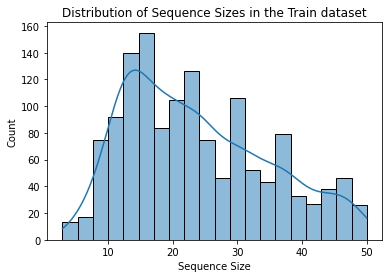

In [6]:
sns.histplot(df_train.sequences.str.len(), bins=20, kde=True);
plt.xlabel("Sequence Size");
plt.title('Distribution of Sequence Sizes in the Train dataset');

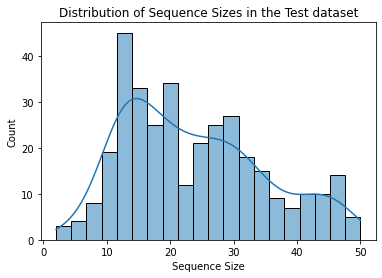

In [7]:
sns.histplot(df_test.sequences.str.len(), bins=20, kde=True);
plt.xlabel("Sequence Size");
plt.title('Distribution of Sequence Sizes in the Test dataset');

In [8]:
train_seq_sizes = df_train.sequences.str.len()
test_seq_sizes = df_test.sequences.str.len()

print(f"Train dataset - mean of sequence sizes: {train_seq_sizes.mean()}")
print(f"Test dataset - mean of sequence sizes: {test_seq_sizes.mean()}")

print(f"Train dataset - smallest sequence size: {train_seq_sizes.min()}")
print(f"Test dataset - smallest sequence size: {test_seq_sizes.min()}")

print(f"Train dataset - largest sequence size: {train_seq_sizes.max()}")
print(f"Test dataset - largest sequence size: {test_seq_sizes.max()}")

Train dataset - mean of sequence sizes: 23.826560232220608
Test dataset - mean of sequence sizes: 23.75872093023256
Train dataset - smallest sequence size: 3
Test dataset - smallest sequence size: 2
Train dataset - largest sequence size: 50
Test dataset - largest sequence size: 50


In [15]:
df_train.sequences.str.count("A")
df_train.sequences.unique()

0       0
1       2
2       8
3       2
4       3
       ..
1373    0
1374    5
1375    0
1376    2
1377    0
Name: sequences, Length: 1378, dtype: int64

array(['RRWWRRWRRW', 'GWKSVFRKAKKVGKTVGGLALDHYLG',
       'ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ', ...,
       'ESEFDRQEYEECKRQCMQLETSGQMRRCVSQCDKRFEEDIDWSKYDNQE',
       'FISAIASFLGKFL', 'RLSRIVVIRVCR'], dtype=object)

Making sure there are no duplicate proteins.

In [1]:
df_train.sequences.duplicated().sum()
df_test.sequences.duplicated().sum()

NameError: name 'df_train' is not defined